<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Save-model" data-toc-modified-id="Save-model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Save model</a></span></li></ul></div>

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [4]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder,  
                                  LabelEncoder, OrdinalEncoder

In [5]:
from sklearn.impute import SimpleImputer, KNNImputer

In [6]:
from sklearn.compose import make_column_transformer

In [7]:
from sklearn.pipeline import make_pipeline

In [8]:
# !pip install category_encoders

In [9]:
from category_encoders import TargetEncoder

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/ironhack-bcn-data-pt/notebooks-0921/main/data/ames.csv')

In [11]:
df.head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MS_SubClass         2930 non-null   object 
 1   MS_Zoning           2930 non-null   object 
 2   Lot_Frontage        2930 non-null   int64  
 3   Lot_Area            2930 non-null   int64  
 4   Street              2930 non-null   object 
 5   Alley               2930 non-null   object 
 6   Lot_Shape           2930 non-null   object 
 7   Land_Contour        2930 non-null   object 
 8   Utilities           2930 non-null   object 
 9   Lot_Config          2930 non-null   object 
 10  Land_Slope          2930 non-null   object 
 11  Neighborhood        2930 non-null   object 
 12  Condition_1         2930 non-null   object 
 13  Condition_2         2930 non-null   object 
 14  Bldg_Type           2930 non-null   object 
 15  House_Style         2930 non-null   object 
 16  Overal

In [77]:
df.Fence.value_counts()

No_Fence             2358
Minimum_Privacy       330
Good_Privacy          118
Good_Wood             112
Minimum_Wood_Wire      12
Name: Fence, dtype: int64

In [82]:
help(OneHotEncoder)

Help on class OneHotEncoder in module sklearn.preprocessing._encoders:

class OneHotEncoder(_BaseEncoder)
 |  OneHotEncoder(*, categories='auto', drop=None, sparse=True, dtype=<class 'numpy.float64'>, handle_unknown='error')
 |  
 |  Encode categorical features as a one-hot numeric array.
 |  
 |  The input to this transformer should be an array-like of integers or
 |  strings, denoting the values taken on by categorical (discrete) features.
 |  The features are encoded using a one-hot (aka 'one-of-K' or 'dummy')
 |  encoding scheme. This creates a binary column for each category and
 |  returns a sparse matrix or dense array (depending on the ``sparse``
 |  parameter)
 |  
 |  By default, the encoder derives the categories based on the unique values
 |  in each feature. Alternatively, you can also specify the `categories`
 |  manually.
 |  
 |  This encoding is needed for feeding categorical data to many scikit-learn
 |  estimators, notably linear models and SVMs with the standard ker

In [83]:
OneHotEncoder(drop='first', sparse=False).fit_transform(df[['Fence']])

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [13]:
df.MS_Zoning.value_counts()

Residential_Low_Density         2273
Residential_Medium_Density       462
Floating_Village_Residential     139
Residential_High_Density          27
C_all                             25
I_all                              2
A_agr                              2
Name: MS_Zoning, dtype: int64

In [15]:
df.Overall_Cond.value_counts()

Average          1654
Above_Average     533
Good              390
Very_Good         144
Below_Average     101
Fair               50
Excellent          41
Poor               10
Very_Poor           7
Name: Overall_Cond, dtype: int64

In [16]:
df.Overall_Qual.value_counts()

Average           825
Above_Average     732
Good              602
Very_Good         350
Below_Average     226
Excellent         107
Fair               40
Very_Excellent     31
Poor               13
Very_Poor           4
Name: Overall_Qual, dtype: int64

In [75]:
df.Overall_Qual.value_counts().index

Index(['Average', 'Above_Average', 'Good', 'Very_Good', 'Below_Average',
       'Excellent', 'Fair', 'Very_Excellent', 'Poor', 'Very_Poor'],
      dtype='object')

In [76]:
cond = ['Very_Poor', 'Poor', 'Fair', 'Below_Average', 'Average', 'Above_Average', 'Good', 'Very_Good',  'Excellent',  'Very_Excellent'  ]

In [19]:
import matplotlib.pyplot as plt

In [20]:
plt.rcParams['figure.figsize'] = (10,10)

<AxesSubplot:xlabel='MS_Zoning', ylabel='Lot_Area'>

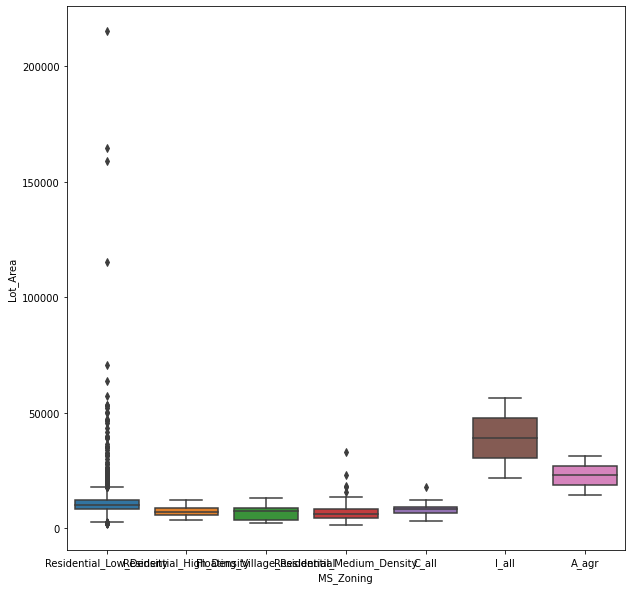

In [21]:
sns.boxplot(data=df,x='MS_Zoning', y='Lot_Area')

<AxesSubplot:xlabel='MS_Zoning', ylabel='Sale_Price'>

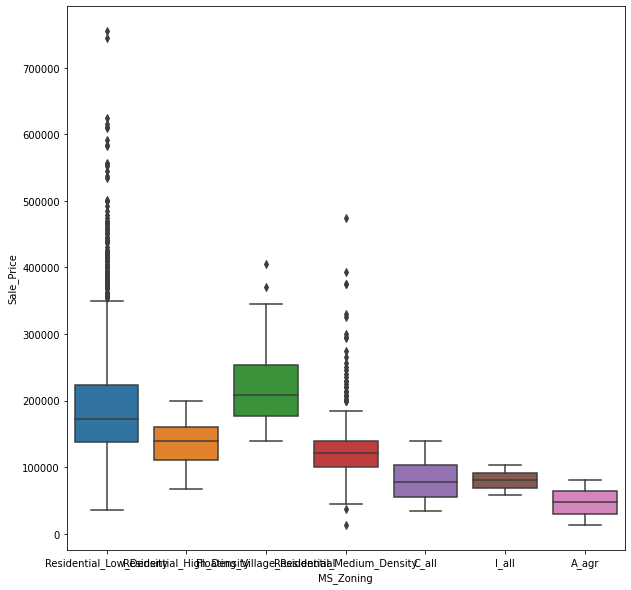

In [23]:
sns.boxplot(data=df,x='MS_Zoning', y='Sale_Price')

In [28]:
X_coded = df[['MS_Zoning']]

In [29]:
X_coded

,MS_Zoning
0,Residential_Low_Density
1,Residential_High_Density
2,Residential_Low_Density
3,Residential_Low_Density
4,Residential_Low_Density
...,...
2925,Residential_Low_Density
2926,Residential_Low_Density
2927,Residential_Low_Density
2928,Residential_Low_Density


In [30]:
X_coded['MS_Zoning_nom'] = LabelEncoder().fit_transform(df['MS_Zoning'])

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
X_coded

,MS_Zoning,MS_Zoning_nom
0,Residential_Low_Density,5
1,Residential_High_Density,4
2,Residential_Low_Density,5
3,Residential_Low_Density,5
4,Residential_Low_Density,5
...,...,...
2925,Residential_Low_Density,5
2926,Residential_Low_Density,5
2927,Residential_Low_Density,5
2928,Residential_Low_Density,5


In [36]:
df.MS_Zoning.value_counts().sort_values(ascending=True).index

Index(['I_all', 'A_agr', 'C_all', 'Residential_High_Density',
       'Floating_Village_Residential', 'Residential_Medium_Density',
       'Residential_Low_Density'],
      dtype='object')

In [62]:
cat = [['I_all', 'A_agr', 'C_all', 'Residential_High_Density',
       'Floating_Village_Residential', 'Residential_Medium_Density',
       'Residential_Low_Density']]

In [63]:
enc = OrdinalEncoder(categories=cat).fit(df[['MS_Zoning']]) 

In [69]:
enc.categories_

[array(['I_all', 'A_agr', 'C_all', 'Residential_High_Density',
        'Floating_Village_Residential', 'Residential_Medium_Density',
        'Residential_Low_Density'], dtype=object)]

In [67]:
X_coded['MS_Zoning_ord'] = OrdinalEncoder(categories=cat).fit_transform(df[['MS_Zoning']]) 

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
X_coded

,MS_Zoning,MS_Zoning_nom,MS_Zoning_ord
0,Residential_Low_Density,5,6.0
1,Residential_High_Density,4,3.0
2,Residential_Low_Density,5,6.0
3,Residential_Low_Density,5,6.0
4,Residential_Low_Density,5,6.0
...,...,...,...
2925,Residential_Low_Density,5,6.0
2926,Residential_Low_Density,5,6.0
2927,Residential_Low_Density,5,6.0
2928,Residential_Low_Density,5,6.0


In [73]:
X_coded['MS_Zoning_tar'] = TargetEncoder(cols=['MS_Zoning']).fit_transform(df[['MS_Zoning']], df['Sale_Price'])

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [74]:
X_coded

,MS_Zoning,MS_Zoning_nom,MS_Zoning_ord,MS_Zoning_tar
0,Residential_Low_Density,5,6.0,191283.251650
1,Residential_High_Density,4,3.0,136419.777778
2,Residential_Low_Density,5,6.0,191283.251650
3,Residential_Low_Density,5,6.0,191283.251650
4,Residential_Low_Density,5,6.0,191283.251650
...,...,...,...,...
2925,Residential_Low_Density,5,6.0,191283.251650
2926,Residential_Low_Density,5,6.0,191283.251650
2927,Residential_Low_Density,5,6.0,191283.251650
2928,Residential_Low_Density,5,6.0,191283.251650


In [84]:
X = df[['Overall_Cond', 'Overall_Qual', 'Lot_Area', 'Lot_Frontage', 'MS_Zoning', 'Fence']]
y = df['Sale_Price']

In [86]:
X.select_dtypes('number').columns

Index(['Lot_Area', 'Lot_Frontage'], dtype='object')

In [92]:
feature_engineering = make_column_transformer((OrdinalEncoder(categories=[cond, cond]), ['Overall_Cond', 'Overall_Qual']),
                                              (OneHotEncoder(drop='first'), ['Fence']),
                                              (TargetEncoder(cols=['MS_Zoning']), ['MS_Zoning']),
                                              (StandardScaler(), X.select_dtypes('number').columns)
                                             )

In [93]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [101]:
pipe = make_pipeline(feature_engineering, Ridge() )

In [102]:
pipe.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Very_Poor',
                                                                              'Poor',
                                                                              'Fair',
                                                                              'Below_Average',
                                                                              'Average',
                                                                              'Above_Average',
                                                                              'Good',
                                                                              'Very_Good',
                                                                              'Excellent',
                                                                              'Very_

In [103]:
pipe.score(X,y)

0.6868597149226369

In [104]:
from sklearn.model_selection import GridSearchCV

In [106]:
import numpy as np

In [109]:
10.0 ** np.arange(-3,3)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [110]:
params = {'ridge__alpha': 10.0 ** np.arange(-3,3)}

In [111]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either est

In [115]:
model = GridSearchCV(pipe, param_grid=params, cv=5).fit(X, y)

In [116]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'feature_names_in_',
 'fit',
 'get_params',
 'inverse_transform',
 'multim

In [117]:
model.best_params_

{'ridge__alpha': 100.0}

In [118]:
model.best_score_

0.6798667333525011

In [120]:
model.best_estimator_.fit(X,y).score(X,y)

0.6866294069077429

## Save model

In [121]:
import pickle

In [124]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model.best_estimator_, f)

In [125]:
with open('model.pkl', 'rb') as f:
    super_modelo = pickle.load(f)

In [127]:
super_modelo.predict(X)

array([231528.8661982 , 127464.11725771, 190969.50860756, ...,
       136556.38888508, 142359.39986505, 223953.12073994])